In [1]:
import networkx as nx
import numpy as np
import itertools
import pickle as pkl
from scipy.spatial import distance
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import os
import sys

new_path=os.getcwd()
new_path =new_path[:-13]
if new_path not in sys.path:
    sys.path.append(new_path)
#----
import pre_extraction
import quality_measure
import terminal_computation 
import filtering
#----

# PlotlyVisualizationModule 7: *Graph pre-extraction from image*.

## The Image

In [2]:
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

resizing image ...
./runs/IMG_0379_motion_16_251x2
./runs/IMG_0379_motion_16_251x2
original dimensions (160, 160, 3)
the width 160  and the new size 18
ratio: 0.1125
(18, 18, 3)
/home/dtheuerkauf/otp_utilities/Tests
here
15101930
pre_extrac from image
./runs/IMG_0379_motion_16_251x2


/home/dtheuerkauf/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



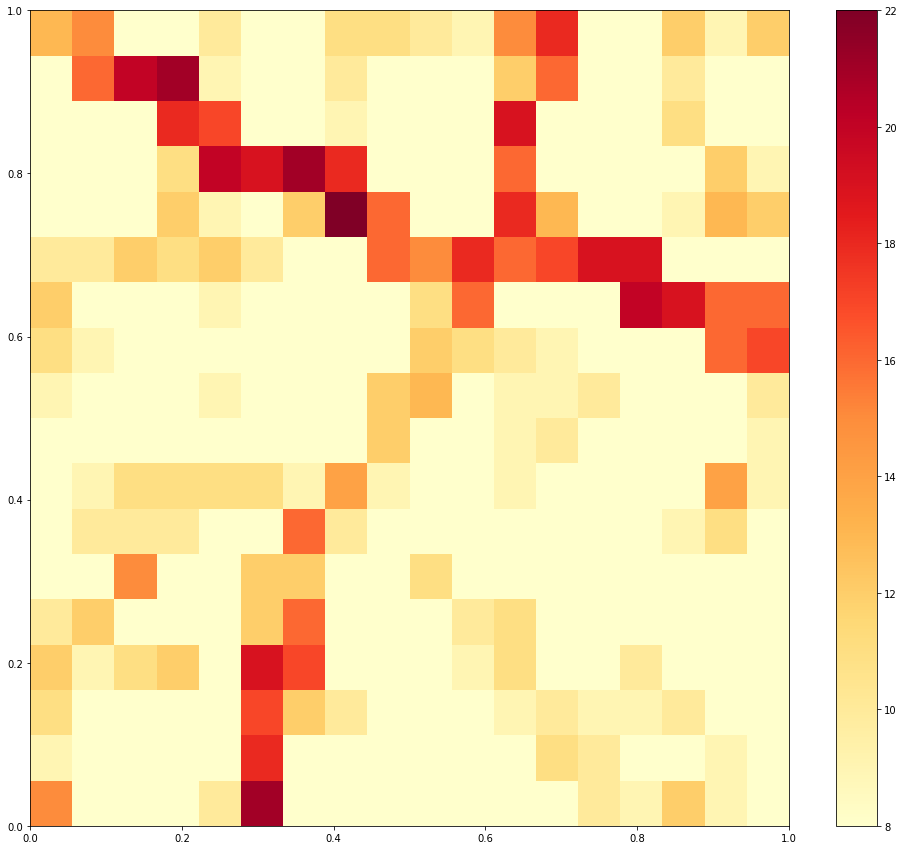

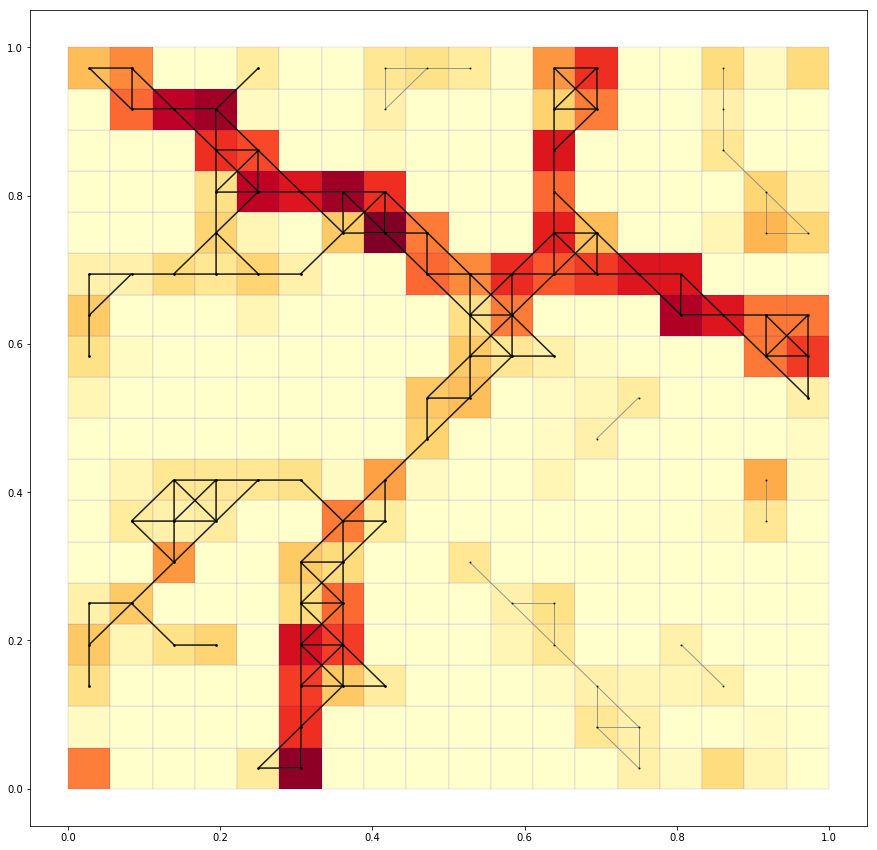

In [3]:
image_path="./PVM_tutorials/PVM_data/IMG_0379_motion_16_251x2.jpg" #fix this
graph_type='1'
t1=.09
t2=.45
number_of_colors=100
number_of_cc=1
new_size=18

current_path=os.getcwd()
os.chdir('../')

G_pre_extracted,_ = pre_extraction.pre_extraction_from_image(image_path,new_size,t2,number_of_colors=100,t1=.09)

os.chdir(current_path)

In [4]:
# 2-color background

partition_dict, _, _ = quality_measure.partition_set(new_size + 1)

import matplotlib.cm as cm

data_grid=[]

for key in G_pre_extracted.nodes:
    p1,p2,p3,p4 = partition_dict[key+1]
    #print(p1,p2,p3,p4)
    x1,y1 = p1
    x2,y2 = p4
    
    color=cm.hot(key)
    square =go.Scatter(x=[x1,x1,x2,x2], y=[y1,y2,y2,y1], fill="toself",fillcolor='orange',opacity=0.3,
                      line=dict(width=0,color='black'),
    hoverinfo='none',
    mode='lines')
    data_grid.append(square)




node_trace_bar_weights= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=15,
        color='black',
        line=dict(width=2)))

for node in G_pre_extracted.nodes():
    x, y = G_pre_extracted.node[node]['pos']
    node_trace_bar_weights['x'] += tuple([x])
    node_trace_bar_weights['y'] += tuple([y])


edge_trace_filtered_full= go.Scatter(
    x=[],
    y=[],
    line=dict(width=1.5,color='gray'),
    hoverinfo='none',
    mode='lines')

for edge in G_pre_extracted.edges():
    x0, y0 = G_pre_extracted.node[edge[0]]['pos']
    x1, y1 = G_pre_extracted.node[edge[1]]['pos']
    edge_trace_filtered_full['x'] += tuple([x0, x1, None])
    edge_trace_filtered_full['y'] += tuple([y0, y1, None])
    

fig7 = go.Figure(data=data_grid+[edge_trace_filtered_full,node_trace_bar_weights],
                 layout=go.Layout(
                     paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
                title='<br>Pre-extracted Graph',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                autosize=False,
                width=800,
                height=750,
                margin=dict(b=20,l=10,r=5,t=40),
                xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=True, showticklabels=True)))
         


iplot(fig7, filename='networkx')

# PlotlyVisualizationModule 8: *Tree approximation*.

In [5]:
bfs_Graph = pre_extraction.tree_approximation(G_pre_extracted)

In [6]:

bfs_tree_nodes= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=17,
        color='black',
        line=dict(width=2)))

for node in bfs_Graph.nodes():
    x, y = bfs_Graph.node[node]['pos']
    bfs_tree_nodes['x'] += tuple([x])
    bfs_tree_nodes['y'] += tuple([y])


bfs_tree_edges= go.Scatter(
    x=[],
    y=[],
    line=dict(width=5,color='black'),
    hoverinfo='none',
    mode='lines')

for edge in bfs_Graph.edges():
    x0, y0 = bfs_Graph.node[edge[0]]['pos']
    x1, y1 = bfs_Graph.node[edge[1]]['pos']
    bfs_tree_edges['x'] += tuple([x0, x1, None])
    bfs_tree_edges['y'] += tuple([y0, y1, None])
    

fig7 = go.Figure(data=data_grid+[edge_trace_filtered_full,node_trace_bar_weights,
    bfs_tree_edges,bfs_tree_nodes],
                 layout=go.Layout(
                     paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
                title='<br>Pre-extracted Graph',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                autosize=False,
                width=800,
                height=750,
                margin=dict(b=20,l=10,r=5,t=40),
                xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=True, showticklabels=True)))
         


iplot(fig7, filename='networkx')



# PlotlyVisualizationModule 9: *Looking for the terminals*.

In [7]:
partition_dict, _, _ = quality_measure.partition_set(new_size + 1)

In [8]:
D= .2

nbr_graph, color_nbr, terminal_list, nodes_for_correction, filter_number = terminal_computation.terminal_finder(D, 
                                                                                           partition_dict, 
                                                                                           G_pre_extracted)


graph size: 84  nodes 155  edges.
bn centralities: --- 0.0526273250579834 second(s) ---
cn centralities: --- 0.06396102905273438 second(s) ---
number of masks: 5.0 5
rest: --- 0.031137466430664062 second(s) ---


In [9]:
len(nbr_graph.nodes)

84

In [10]:
len(color_nbr)

84

In [11]:
# terminal finder grid
data_finder=[]

partition_dict_finder, _, _ = quality_measure.partition_set(filter_number + 1)

for key in partition_dict_finder.keys():
    p1,p2,p3,p4 = partition_dict_finder[key]
    #print(p1,p2,p3,p4)
    x1,y1 = p1
    x2,y2 = p4
    
    #color=cm.hot(key)
    square =go.Scatter(x=[x1,x1,x2,x2,x1], y=[y1,y2,y2,y1,y1], fill="toself",fillcolor='white',opacity=0.3,
                      line=dict(width=2,color='black'),
    hoverinfo='none',
    mode='lines')
    data_finder.append(square)



colored_nodes= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=14,
        color=color_nbr,
        line=dict(width=1)))

for node in nbr_graph.nodes():
    x, y = nbr_graph.node[node]['pos']
    colored_nodes['x'] += tuple([x])
    colored_nodes['y'] += tuple([y])
    
terminals= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=20,
        color='yellow',
        line=dict(width=2)))

for node in terminal_list:
    x, y = nbr_graph.node[node]['pos']
    terminals['x'] += tuple([x])
    terminals['y'] += tuple([y])


fig7 = go.Figure(data=data_grid+data_finder+[bfs_tree_edges,#bfs_tree_nodes,
                       colored_nodes,
                      terminals],
                 layout=go.Layout(
                     paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
                title='<br>Terminal map',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                autosize=False,
                width=800,
                height=750,
                margin=dict(b=20,l=10,r=5,t=40),
                xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=True, showticklabels=True)))
         


iplot(fig7, filename='networkx')

# PlotlyVisualizationModule 10: *Filtering*.

In [21]:
folder_name='./runs/1_b14_6dv_sf14_rect_cnstrect_cnst/'
min_=.01
entries=[0]
terminal_info = [terminal_list,entries]
input_flag='image'
beta_d=1.0

current_path=os.getcwd()
print(current_path)
os.chdir('../')

G_filtered,_,_,_,_,_, conv_report = filtering.filtering(
                bfs_Graph,
              beta_d,
              min_,
              folder_name,
              terminal_info,
                input_flag='image')
os.chdir(current_path)

/home/dtheuerkauf/otp_utilities/Tests/PVM_tutorials
defining pflux.dat for beta= 1.0
/home/dtheuerkauf/otp_utilities/Tests
len(comp) 1
number of cc: 1
Creation of the directory ../muffe_sparse_optimization/simplifications/runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1 failed.
Creation of the directory ../muffe_sparse_optimization/simplifications/runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1/input failed.
Creating the .dat files for this component
G 84
num ss 13
executing graph2incidence_matrix for the component 1
_____________________________EXECUTING BP solver___________________________________________
Creation of the directory ./runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1/ failed.
Creation of the directory ./runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1/output failed.
Creation of the directory ./runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1/ failed.
Creation of the directory ./runs/1_b14_6dv_sf14_rect_cnstrect_cnst//component1/output/result failed.
Creation 

In [22]:
for key,val in conv_report.items():
    print('\n cc:',key)
    for elem in val:
        print(elem)


 cc: 1
success rate (%)= 100
|last_var_tdens|>1E-20:True
|V(G)-V(G_f)|= 26
|E(G)-E(G_f)|= 26
|cc(G_f)| = 1


In [23]:
source_sink_colors=[]
for node in terminal_list:
    if terminal_list.index(node) in entries:
        source_sink_colors.append('green')
    else:
        source_sink_colors.append('red')

In [24]:
node_simpl_trace_bar_weights= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=17,
        color='yellow',
        line=dict(width=2)))

for node in G_filtered.nodes():
    x, y = G_filtered.node[node]['pos']
    node_simpl_trace_bar_weights['x'] += tuple([x])
    node_simpl_trace_bar_weights['y'] += tuple([y])


edge_simpl_trace_filtered_full= go.Scatter(
    x=[],
    y=[],
    line=dict(width=4,color='yellow'),
    hoverinfo='none',
    mode='lines')

for edge in G_filtered.edges():
    x0, y0 = G_filtered.node[edge[0]]['pos']
    x1, y1 = G_filtered.node[edge[1]]['pos']
    edge_simpl_trace_filtered_full['x'] += tuple([x0, x1, None])
    edge_simpl_trace_filtered_full['y'] += tuple([y0, y1, None])
    
    
    
terminals= go.Scatter(
    x=[],
    y=[],
    #text=weights,
    mode='markers',
    #hoverinfo='text',
    marker=dict(
        size=20,
        color='yellow',
        line=dict(width=3,
                 color=source_sink_colors)))

for node in terminal_list:
    x, y = nbr_graph.node[node]['pos']
    terminals['x'] += tuple([x])
    terminals['y'] += tuple([y])
      


fig7 = go.Figure(data=data_grid+[bfs_tree_edges,bfs_tree_nodes,
                       edge_simpl_trace_filtered_full,node_simpl_trace_bar_weights,
                    terminals],
                 layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
                title='<br>Graph filtered',
                titlefont=dict(size=16),
                showlegend=True,
                hovermode='closest',
                autosize=False,
                width=800,
                height=800,
                margin=dict(b=20,l=10,r=5,t=40),
                xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=True, showticklabels=True)))
         


iplot(fig7, filename='networkx')